written to provide a test case/pain-in-the-ass edge case for a fix to the matplotlib/dark-theme legibility issues in Jupyterlab. Basically, creating plots with the default matplotlib style when using the dark-theme led to black text getting printed on a black background.

Pull requests with the fix code can be found at:
https://github.com/ipython/ipykernel/pull/336
https://github.com/jupyterlab/jupyterlab/pull/5232

## matplotlib default theme

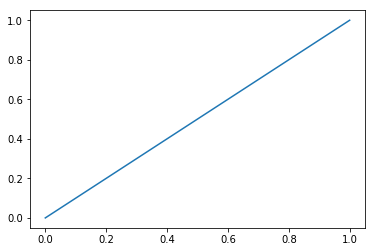

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.gca()

ax.plot((0,1),(0,1))

## matplotlib dark theme

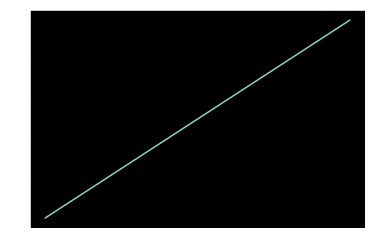

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = 'none'

fig = plt.figure()
ax = fig.gca()

ax.plot((0,1),(0,1))

## ticks of many colors (but similar luminances)

Even if the colors of the ticks don't match, so long as their luminances (ie light-ness or dark-ness) match an appropriate background will still be placed behind a figure (if needed)

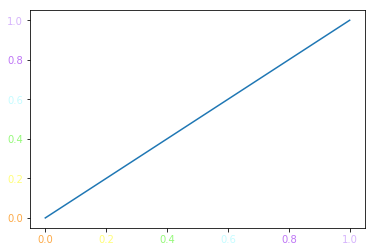

In [1]:
%matplotlib inline
from itertools import cycle
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.gca()

lines = ax.plot((0,1),(0,1))
for axis in (ax.xaxis, ax.yaxis):
    rainbow = cycle('xkcd:' + c for c in ('light pink', 'light orange', 'light yellow', 'light green', 'light sky blue', 'light purple', 'light violet'))
    for label in axis.get_ticklabels():
        label.set_color(next(rainbow))
lines

## ticks of many colors and luminances

If the tick luminances don't agree, don't bother trying to think of something fancy, just do nothing. If we're in this situation, it is reasonable to assume that the user knows enough about matplotlib to be trusted to fix their own problem

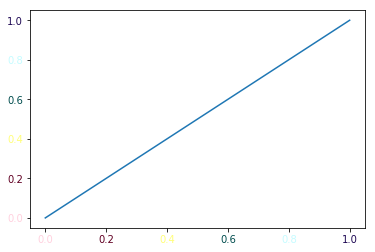

In [1]:
%matplotlib inline
from itertools import cycle
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.gca()

lines = ax.plot((0,1),(0,1))
for axis in (ax.xaxis, ax.yaxis):
    rainbow = cycle('xkcd:' + c for c in ('black', 'light pink', 'burgundy', 'light yellow', 'dark teal', 'light sky blue', 'dark indigo', 'light violet'))
    for label in axis.get_ticklabels():
        label.set_color(next(rainbow))
lines